## Imports

In [1]:
import msc

########### Magics ##########
%load_ext autoreload
%autoreload 2

In [14]:
%matplotlib qt  # for interactive viewing of mne plots


UsageError: unrecognized arguments: # for interactive viewing of mne plots


## Load Data

In [16]:
# pick your channels
picks = msc.data_utils.PicksOptions.common_channels

# load the raw data
raw = msc.data_utils.load_raw_data(picks=picks)
print(raw)

<RawNicolet | 103001102_0113.data, 19 x 2561 (10.0 s), ~404 kB, data loaded>


C:\Users\noam\Repositories\noamsgl\msc\msc\data_utils\load.py:116: RuntimeWarning: Channel(s) ['T7', 'T8', 'P7', 'P8'] could not be picked, because they are not present in the info instance.
  raw = raw.pick(picks).crop(offset, offset + crop).filter(l_freq=LFREQ, h_freq=HFREQ)


## Display Data

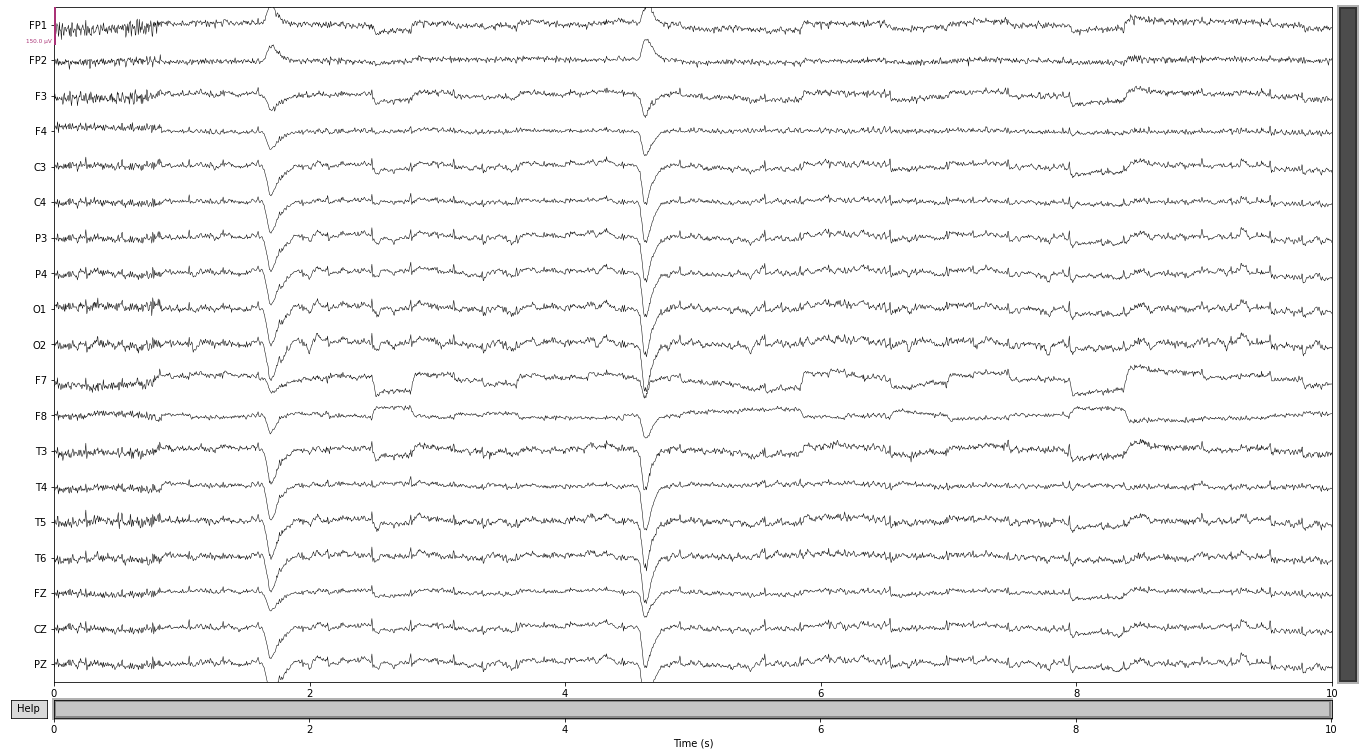

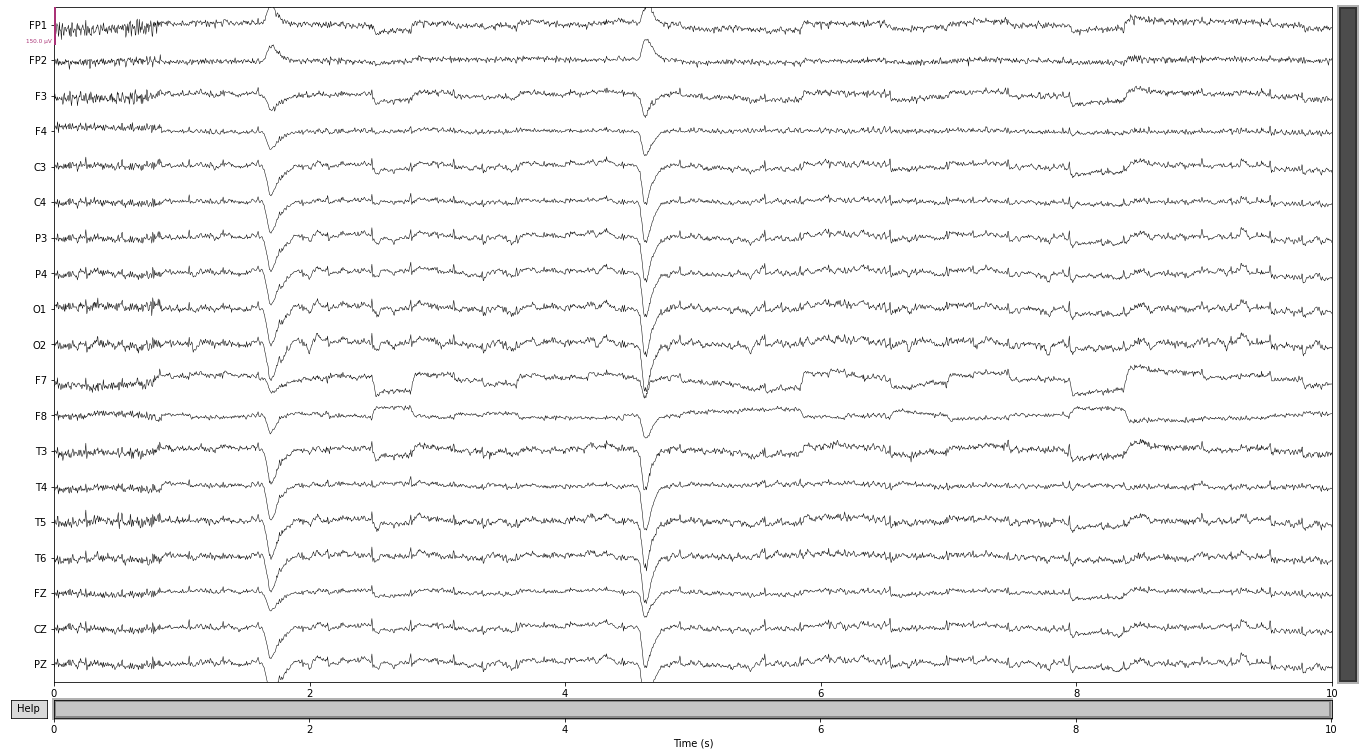

In [26]:
raw.plot(scalings=0.75e-4)


In [4]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: C3
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2008-07-13 08:07:34 UTC
 nchan: 1
 projs: []
 sfreq: 256.0 Hz
>

In [5]:
raw.to_data_frame()

,time,C3
0,0,-97.913
1,4,-91.111
2,8,-81.803
3,12,-79.655
4,16,-73.748
...,...,...
2556,9984,-97.913
2557,9988,-98.629
2558,9992,-100.419
2559,9996,-97.197


In [6]:
raw.get_data()

array([[-9.79130e-05, -9.11110e-05, -8.18030e-05, ..., -1.00419e-04,
        -9.71970e-05, -1.05431e-04]])

## Load Dataset

In [7]:
# dataset = msc.etl.load_tensor_dataset(picks=msc.etl.PicksOptions.common_channels)
dataset = msc.data_utils.load_tensor_dataset(picks=msc.data_utils.PicksOptions.one_channel)
# train_x = dataset.get("train_x")
# train_y = dataset.get("train_y")
dataset

{'train_x': tensor([0.0000e+00, 3.9062e-03, 7.8125e-03,  ..., 9.9922e+00, 9.9961e+00,
         1.0000e+01]),
 'train_y': tensor([-0.4983, -0.2353,  0.1245,  ..., -0.5951, -0.4706, -0.7889]),
 'test_x': tensor([10.0039, 10.0078, 10.0117, 10.0156, 10.0195, 10.0234, 10.0273, 10.0312,
         10.0352, 10.0391, 10.0430, 10.0469, 10.0508, 10.0547, 10.0586, 10.0625,
         10.0664, 10.0703, 10.0742, 10.0781, 10.0820, 10.0859, 10.0898, 10.0938,
         10.0977, 10.1016, 10.1055, 10.1094, 10.1133, 10.1172, 10.1211, 10.1250,
         10.1289, 10.1328, 10.1367, 10.1406, 10.1445, 10.1484, 10.1523, 10.1562,
         10.1602, 10.1641, 10.1680, 10.1719, 10.1758, 10.1797, 10.1836, 10.1875,
         10.1914, 10.1953, 10.1992, 10.2031, 10.2070, 10.2109, 10.2148, 10.2188,
         10.2227, 10.2266, 10.2305, 10.2344, 10.2383, 10.2422, 10.2461, 10.2500,
         10.2539, 10.2578, 10.2617, 10.2656, 10.2695, 10.2734, 10.2773, 10.2812,
         10.2852, 10.2891, 10.2930, 10.2969, 10.3008, 10.3047, 10.3086

In [8]:
train_x = dataset.get("train_x")
train_y = dataset.get("train_y")
test_x = dataset.get("test_x")
test_y = dataset.get("test_y")

In [9]:
train_y.size()

torch.Size([2561])

In [10]:
train_y

tensor([-0.4983, -0.2353,  0.1245,  ..., -0.5951, -0.4706, -0.7889])

In [11]:
raw.filter(l_freq=0.5, h_freq=None).get_data()

array([[5.08219768e-21, 6.73808806e-06, 1.59819130e-05, ...,
        4.81590359e-06, 8.13581376e-06, 3.38813179e-21]])